In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

reg = np.load('fits/zfourge_galaxy.npz', allow_pickle=True)
sf = np.load('fits/zfourge_star_forming.npz', allow_pickle=True)
# agn_frac = np.load('fits/cigale_AGN_straight_flux.npz', allow_pickle=True)
agn_frac = np.load('fits/new_cigale_agn_vary.npz', allow_pickle=True)
sf_frac = np.load('fits/new_cigale_sf.npz', allow_pickle=True)
total_frac = np.load('fits/new_cigale_total.npz', allow_pickle=True)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Cambria']
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Cambria'
plt.rcParams['mathtext.it'] = 'Cambria:italic'
plt.rcParams['mathtext.bf'] = 'Cambria:bold'
plt.rcParams['axes.formatter.use_mathtext'] = True

C:\Users\danie\AppData\Local\Temp\ipykernel_14220\3915255961.py:7: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + c


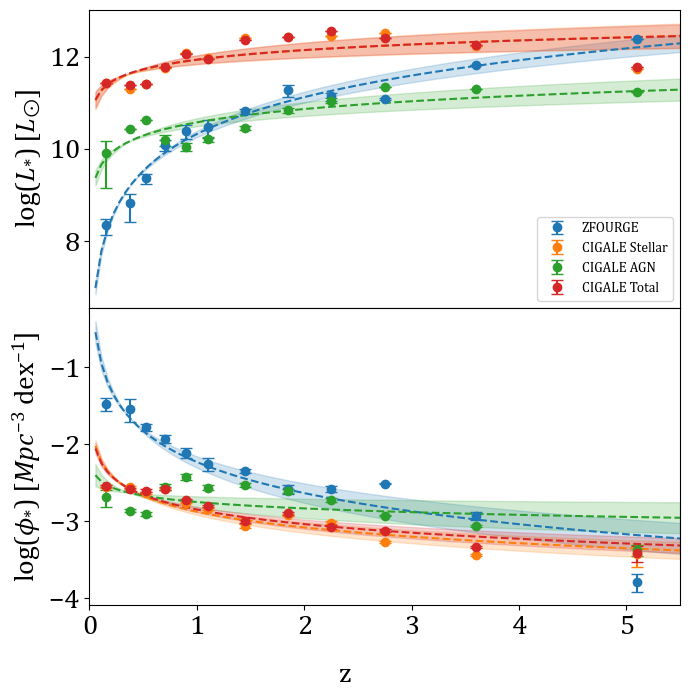

In [12]:
# Setup the figure and axis
fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
z_centers = [(z[0] + z[1]) / 2 for z in reg['z']]
long_z = np.linspace(0, 5.5, 100)

def log_func(x, a, c):
    return a * np.log(x) + c

def fit_and_plot(axes, y, color):
    params, cov = curve_fit(log_func, z_centers, np.log10(y), p0=[max(y), max(y)])
    perr = np.sqrt(np.diag(cov))
    axes.plot(long_z, log_func(long_z, *params), linestyle='--', color=color)
    axes.fill_between(long_z, log_func(long_z, *(params - perr)), log_func(long_z, *(params + perr)), alpha=0.2, color=color)
    
def plot_data(axes, params, error, label):
    yerr=[np.log10(params) - np.log10(np.abs(params - error)), np.log10(params + error) - np.log10(params)]
    axes.errorbar(z_centers, np.log10(params), yerr=yerr, label=label, fmt='o', capsize=4)

# Lstar params
zfourge_Lstar_params = reg['saunder_p'][:,0].astype(float)
stellar_Lstar_params = sf_frac['saunder_p'][:,0].astype(float)
agn_Lstar_params = agn_frac['saunder_p'][:,0].astype(float)
total_Lstar_params = total_frac['saunder_p'][:,0].astype(float)

# Lstar error
zfourge_Lstar_err = reg['saunder_e'][:,0].astype(float)
stellar_Lstar_err = sf_frac['saunder_e'][:,0].astype(float)
agn_Lstar_err = agn_frac['saunder_e'][:,0].astype(float)
total_Lstar_err = total_frac['saunder_e'][:,0].astype(float)

# Lstar plot
plot_data(ax[0], zfourge_Lstar_params, zfourge_Lstar_err, 'ZFOURGE') # ZFOURGE plot
plot_data(ax[0], stellar_Lstar_params, stellar_Lstar_err, 'CIGALE Stellar') # Stellar plot
plot_data(ax[0], agn_Lstar_params, agn_Lstar_err, 'CIGALE AGN') # AGN plot
plot_data(ax[0], total_Lstar_params, total_Lstar_err, 'CIGALE Total') # Total plot
fit_and_plot(ax[0], zfourge_Lstar_params, 'C0')
fit_and_plot(ax[0], stellar_Lstar_params, 'C1')
fit_and_plot(ax[0], agn_Lstar_params, 'C2')
fit_and_plot(ax[0], total_Lstar_params, 'C3')
ax[0].set_ylabel('log($L_{*}$) [$L_{\odot}$]', fontsize=20)
ax[0].legend()
ax[0].set_xlim(0, 5.5)
ax[0].tick_params(axis='both', labelsize=20)

# Phistar params
zfourge_phistar_params = reg['saunder_p'][:,1].astype(float)
stellar_phistar_params = sf_frac['saunder_p'][:,1].astype(float)
agn_phistar_params = agn_frac['saunder_p'][:,1].astype(float)
total_phistar_params = total_frac['saunder_p'][:,1].astype(float)

# Phistar error
zfourge_phistar_err = reg['saunder_e'][:,1].astype(float)
stellar_phistar_err = sf_frac['saunder_e'][:,1].astype(float)
agn_phistar_err = agn_frac['saunder_e'][:,1].astype(float)
total_phistar_err = total_frac['saunder_e'][:,1].astype(float)

# Phistar plot
plot_data(ax[1], zfourge_phistar_params, zfourge_phistar_err, 'ZFOURGE') # ZFOURGE plot
plot_data(ax[1], stellar_phistar_params, stellar_phistar_err, 'CIGALE Stellar') # Stellar plot
plot_data(ax[1], agn_phistar_params, agn_phistar_err, 'CIGALE AGN') # AGN plot
plot_data(ax[1], total_phistar_params, total_phistar_err, 'CIGALE Total') # Total plot
fit_and_plot(ax[1], zfourge_phistar_params, 'C0')
fit_and_plot(ax[1], stellar_phistar_params, 'C1')
fit_and_plot(ax[1], agn_phistar_params, 'C2')
fit_and_plot(ax[1], total_phistar_params, 'C3')
ax[1].set_ylabel('log($\phi_{*}$) [$Mpc^{-3}$ dex$^{-1}$]', fontsize=20)
ax[1].tick_params(axis='both', labelsize=20)

fig.supxlabel('z', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_14220\83865453.py:4: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + c


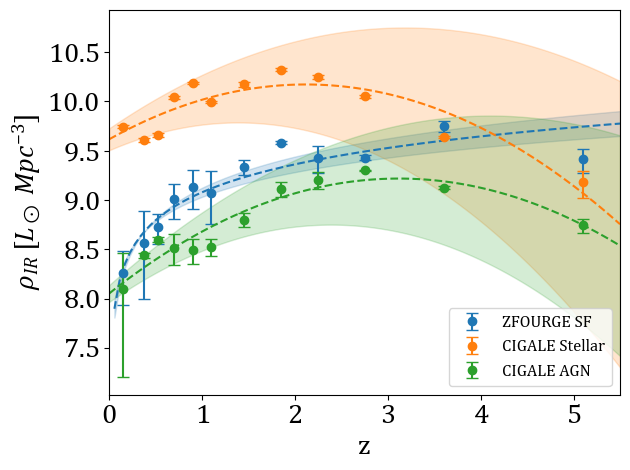

In [13]:
import scipy.integrate as integrate

def log_func(x, a, c):
    return a * np.log(x) + c

def quadratic(x, a, b, c):
    return a*x**2 + b*x + c

# Define the integration limits
lower_bound = 10**8
upper_bound = 10**14

def cigale_saunders_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * 0.7 ** 2) * (np.log10(1 + (L / L_star)))**2)

def zf_saunders_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * 0.7 ** 2) * (np.log10(1 + (L / L_star)))**2)

def zf_mid_saunders_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * 0.9 ** 2) * (np.log10(1 + (L / L_star)))**2)

def zf_local_saunders_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * 1.0 ** 2) * (np.log10(1 + (L / L_star)))**2)

def zf_first_saunders_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * 1.1 ** 2) * (np.log10(1 + (L / L_star)))**2)

cigale_functions = [cigale_saunders_luminosity for _ in range(len(z_centers))]
zf_functions = [zf_saunders_luminosity for _ in range(len(z_centers)-3)]
zf_functions.insert(0, zf_first_saunders_luminosity)
zf_functions.insert(1, zf_local_saunders_luminosity)
zf_functions.insert(2, zf_mid_saunders_luminosity)

# Integrate the Saunders function
def area_under_curve(params, errors, functions):
    area = []
    up_area = []
    low_area = []
    for (l_star, phi_star), (l_e, phi_e), f in zip(params, errors, functions):
        a, _ = integrate.quad(f, lower_bound, upper_bound, args=(l_star, phi_star))
        u_a = integrate.quad(f, lower_bound, upper_bound, args=(l_star + l_e, phi_star + phi_e))[0]
        l_a = integrate.quad(f, lower_bound, upper_bound, args=(l_star - l_e, phi_star - phi_e))[0]
        area.append(a)
        up_area.append(u_a)
        low_area.append(l_a)
    up_area = np.array(up_area) - np.array(area)
    low_area = np.array(area) - np.array(low_area)
    return np.array(area), up_area, low_area

def fit_and_plot(params, errors, functions, color, label, evol_func):
    area, up_area, low_area = area_under_curve(params, errors, functions)
    yerr = [np.log10(area) - np.log10(np.abs(area - low_area)), np.log10(area + up_area) - np.log10(area)]
    params, cov = curve_fit(evol_func, z_centers, np.log10(area))
    perr = np.sqrt(np.diag(cov))
    plt.errorbar(z_centers, np.log10(area), yerr=yerr, label=label, fmt='o', capsize=4, color=color)
    plt.plot(long_z, evol_func(long_z, *params), linestyle='--', color=color)
    plt.fill_between(long_z, evol_func(long_z, *(params - perr)), evol_func(long_z, *(params + perr)), alpha=0.2, color=color)

fit_and_plot(sf['saunder_p'], sf['saunder_e'], zf_functions, 'C0', 'ZFOURGE SF', log_func)
fit_and_plot(sf_frac['saunder_p'], sf_frac['saunder_e'], cigale_functions, 'C1', 'CIGALE Stellar', quadratic)
fit_and_plot(agn_frac['saunder_p'], agn_frac['saunder_e'], cigale_functions, 'C2', 'CIGALE AGN', quadratic)
# fit_and_plot(total_frac['saunder_p'], total_frac['saunder_e'], cigale_functions, 'C3', 'CIGALE Total')

# Plot
plt.ylabel(r'$\rho_{IR}$ [$L_\odot$ $Mpc^{-3}$]', fontsize=20)
plt.xlabel('z', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0, 5.5)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.savefig('new_density_evol.png')
plt.show()

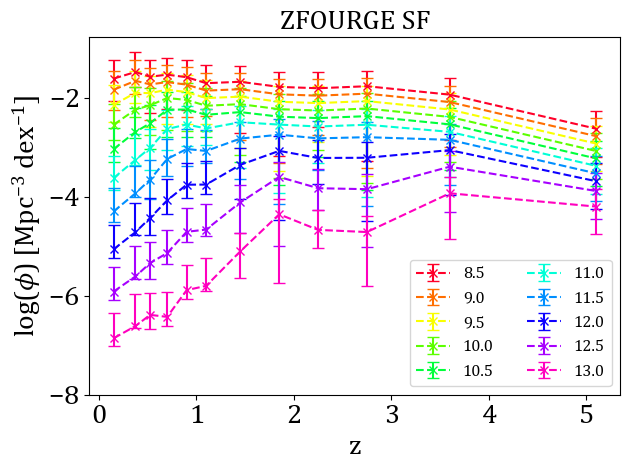

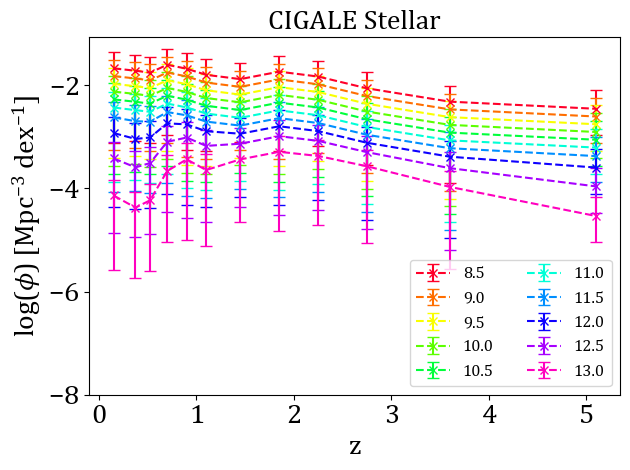

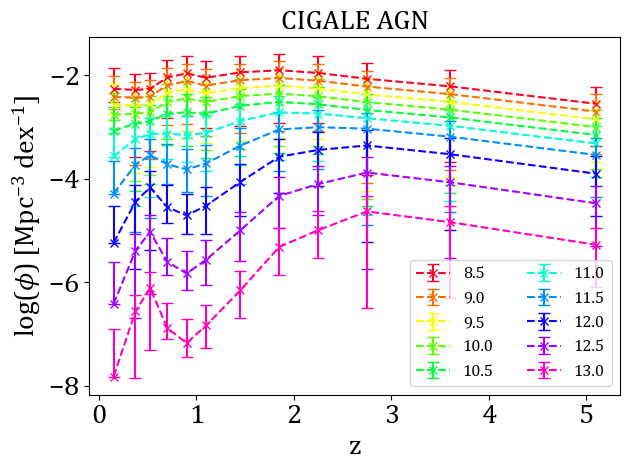

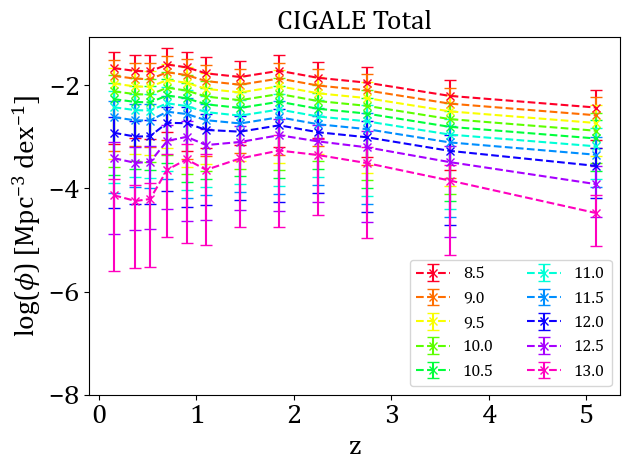

In [14]:
# redshift_centers = np.mean(reg['z'], axis=1)
luminosity_centers = np.arange(8.5, 13.5, 0.5) 
colors = plt.cm.gist_rainbow(np.linspace(0,1,len(luminosity_centers)))

# Iterate over the luminosity bins
def class_density(params, errors, functions):
    est_phi = [
        [f(10**l_center, *param) for param, f in zip(params, functions)]
        for l_center in luminosity_centers
    ]
    
    est_phi_e = [
        [
            [f(10**l_center, *(param - perr)), f(10**l_center, *(param + perr))]
            for param, perr, f in zip(params, errors, functions)
        ]
        for l_center in luminosity_centers
    ]
    
    return est_phi, est_phi_e

def plot_class_density(params, errors, functions, title):

    est_phi, est_phi_e = class_density(params, errors, functions)
    
    # Plot the estimated number densities
    for nphi, lcent, c, nphie in zip(est_phi, luminosity_centers, colors, est_phi_e):
        nphie = np.array(nphie).T
        nphi = np.array(nphi)
        yerr = [np.log10(nphi) - np.log10(nphi - nphie[0]), np.log10(nphi + nphie[1]) - np.log10(nphi)]
        plt.errorbar(z_centers, np.log10(nphi), yerr=yerr, capsize=4, color=c, label=f'{lcent}', linestyle='--', marker='x')
        
    plt.legend(ncols=2, fontsize=12)
    plt.title(title, fontsize=20)
    plt.xlabel('z', fontsize=20)
    plt.ylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks([-8, -6, -4, -2], fontsize=20)
    plt.tight_layout()
    plt.show()
    
plot_class_density(sf['saunder_p'], sf['saunder_e'], zf_functions, 'ZFOURGE SF')
plot_class_density(sf_frac['saunder_p'], sf_frac['saunder_e'], cigale_functions, 'CIGALE Stellar')
plot_class_density(agn_frac['saunder_p'], agn_frac['saunder_e'], cigale_functions, 'CIGALE AGN')
plot_class_density(total_frac['saunder_p'], total_frac['saunder_e'], cigale_functions, 'CIGALE Total')